In [75]:
import pandas as pd
import matplotlib.pyplot as plt
rawData = pd.read_csv('data/data.scv', sep='\t')
rawData.time = pd.to_datetime(rawData.time)
rawData = rawData.set_index(rawData.time)
rawData = rawData.drop(['time'],axis=1)
rawData['month'] = rawData.index.month

rawData.head()

,psfc,msl,wSpeed.50,wDir.50,wSpeed.850hpa,wDir.850hpa,temperature.10,temperature.50,dispHeight,precIceWater,precLiqWater,precWaterVapor,specHumidity.10,month
time,,,,,,,,,,,,,,
1990-01-01 00:00:00,100222.2,101272.5,11.27,259.6,18.02,293.3,-10.63,-11.43,0.1,0.0,1.3,6212.4,1.4,1
1990-01-01 01:00:00,100068.3,101118.8,11.65,261.6,19.68,295.1,-9.37,-10.21,0.1,0.0,0.3,6500.8,1.5,1
1990-01-01 02:00:00,99929.3,100975.7,12.53,267.1,20.97,300.0,-7.51,-8.43,0.1,0.0,0.0,5970.2,1.7,1
1990-01-01 03:00:00,99843.4,100890.6,12.16,272.1,21.43,305.3,-6.51,-7.41,0.1,0.1,0.0,5753.2,1.9,1
1990-01-01 04:00:00,99813.9,100869.8,11.81,279.3,20.91,310.8,-6.38,-7.23,0.1,0.9,6.1,6736.5,1.9,1


In [76]:
temperature = pd.DataFrame(rawData['temperature.10'])

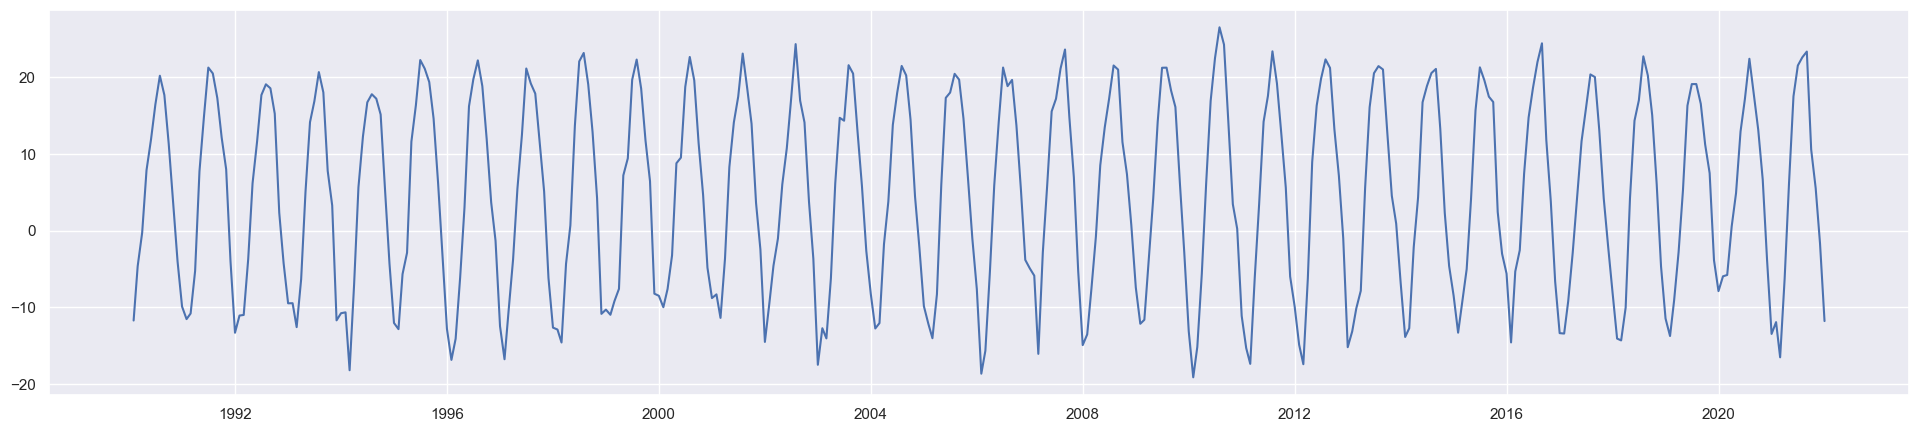

In [77]:
f, ax = plt.subplots()
f.set_size_inches(24,5)

ax.plot(temperature.resample('M').mean())

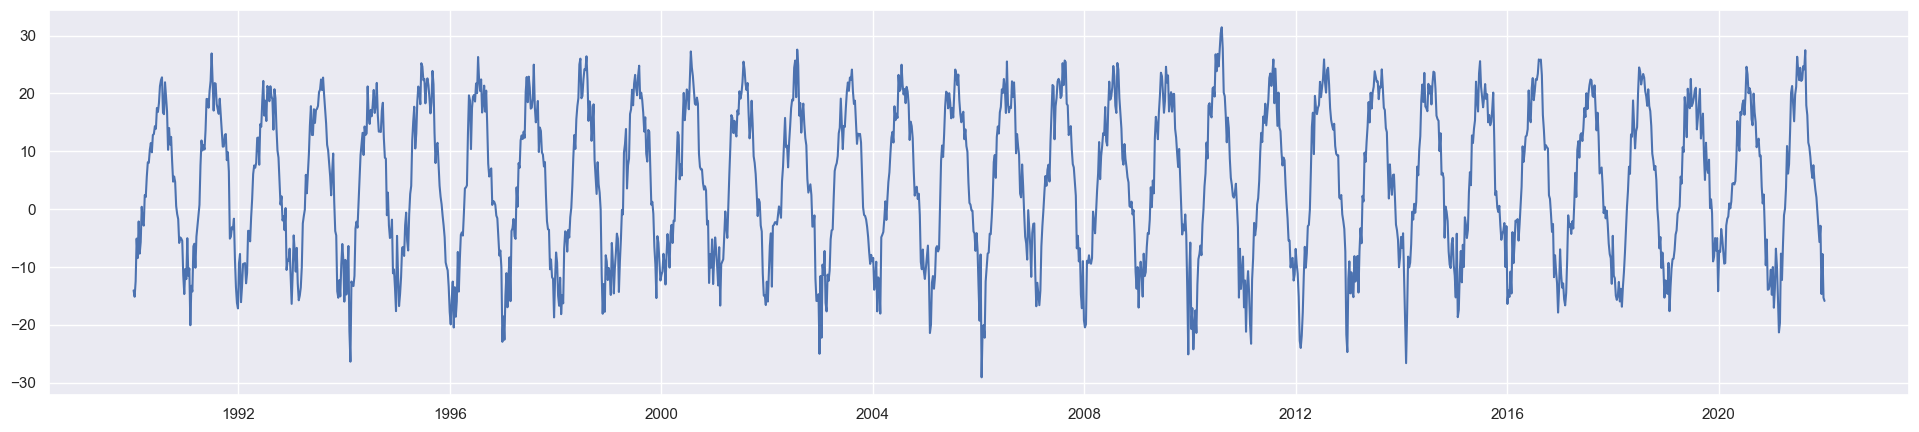

In [78]:
f, ax = plt.subplots()
f.set_size_inches(24,5)

ax.plot(temperature.resample('W').mean())

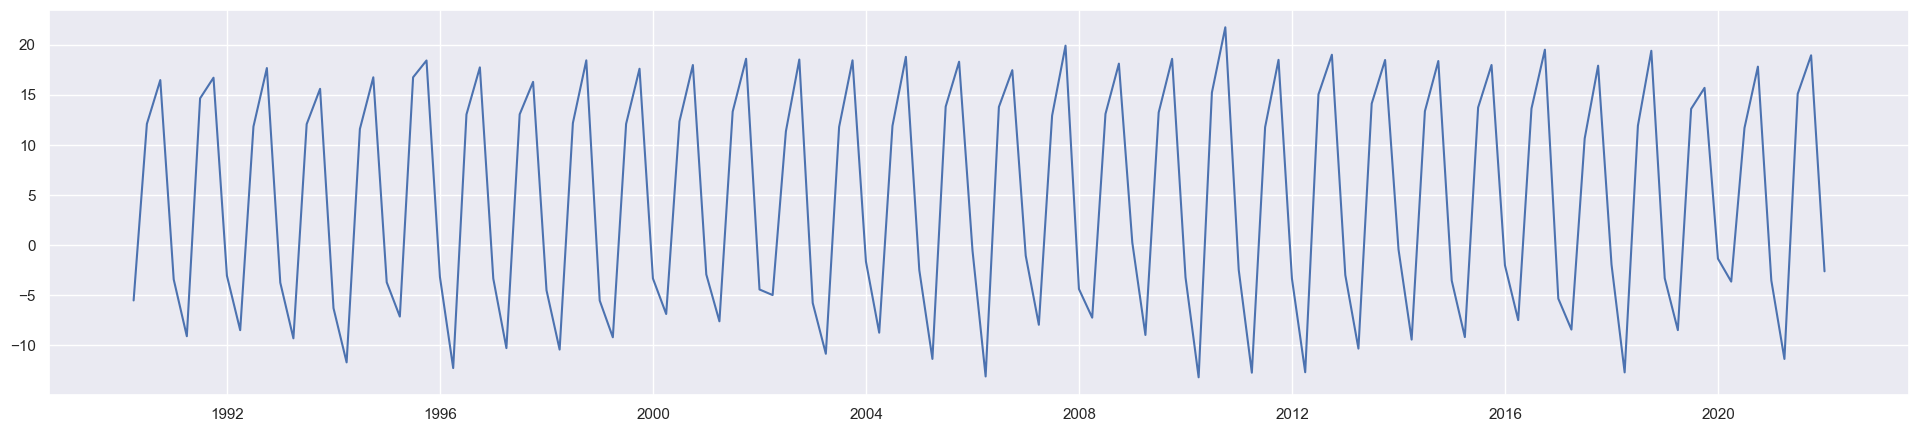

In [79]:
f, ax = plt.subplots()
f.set_size_inches(24,5)

ax.plot(temperature.resample('Q').mean())

In [80]:
temperature.head()

,temperature.10
time,
1990-01-01 00:00:00,-10.63
1990-01-01 01:00:00,-9.37
1990-01-01 02:00:00,-7.51
1990-01-01 03:00:00,-6.51
1990-01-01 04:00:00,-6.38


In [81]:
temperature.insert(1,'yesterday',temperature.copy().shift(1))

In [82]:
temperature.head()

,temperature.10,yesterday
time,,
1990-01-01 00:00:00,-10.63,NaN
1990-01-01 01:00:00,-9.37,-10.63
1990-01-01 02:00:00,-7.51,-9.37
1990-01-01 03:00:00,-6.51,-7.51
1990-01-01 04:00:00,-6.38,-6.51


In [83]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.MinMaxScaler().fit(X=np.array(rawData))
DataScaler = scaler.transform(np.array(rawData))
df = pd.DataFrame(DataScaler, columns=rawData.columns)

df.head()

,psfc,msl,wSpeed.50,wDir.50,wSpeed.850hpa,wDir.850hpa,temperature.10,temperature.50,dispHeight,precIceWater,precLiqWater,precWaterVapor,specHumidity.10,month
0,0.454060,0.453014,0.505623,0.721111,0.444143,0.814722,0.372378,0.377417,0.333333,0.000000,0.002249,0.117829,0.071429,0.0
1,0.436998,0.436171,0.522717,0.726667,0.485080,0.819722,0.388299,0.392538,0.333333,0.000000,0.000519,0.124063,0.076923,0.0
2,0.421589,0.420489,0.562303,0.741944,0.516893,0.833333,0.411802,0.414601,0.333333,0.000000,0.000000,0.112594,0.087912,0.0
3,0.412066,0.411163,0.545659,0.755833,0.528237,0.848056,0.424438,0.427243,0.333333,0.000194,0.000000,0.107903,0.098901,0.0
4,0.408796,0.408883,0.529915,0.775833,0.515413,0.863333,0.426080,0.429474,0.333333,0.001744,0.010552,0.129158,0.098901,0.0


In [84]:
i = 1
for column in rawData.columns:
    rawData[f'hour-1{column}'] = rawData[column].copy().shift(i)
rawData.head()

,psfc,msl,wSpeed.50,wDir.50,wSpeed.850hpa,wDir.850hpa,temperature.10,temperature.50,dispHeight,precIceWater,...,hour-1wSpeed.850hpa,hour-1wDir.850hpa,hour-1temperature.10,hour-1temperature.50,hour-1dispHeight,hour-1precIceWater,hour-1precLiqWater,hour-1precWaterVapor,hour-1specHumidity.10,hour-1month
time,,,,,,,,,,,,,,,,,,,,,
1990-01-01 00:00:00,100222.2,101272.5,11.27,259.6,18.02,293.3,-10.63,-11.43,0.1,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-01 01:00:00,100068.3,101118.8,11.65,261.6,19.68,295.1,-9.37,-10.21,0.1,0.0,...,18.02,293.3,-10.63,-11.43,0.1,0.0,1.3,6212.4,1.4,1.0
1990-01-01 02:00:00,99929.3,100975.7,12.53,267.1,20.97,300.0,-7.51,-8.43,0.1,0.0,...,19.68,295.1,-9.37,-10.21,0.1,0.0,0.3,6500.8,1.5,1.0
1990-01-01 03:00:00,99843.4,100890.6,12.16,272.1,21.43,305.3,-6.51,-7.41,0.1,0.1,...,20.97,300.0,-7.51,-8.43,0.1,0.0,0.0,5970.2,1.7,1.0
1990-01-01 04:00:00,99813.9,100869.8,11.81,279.3,20.91,310.8,-6.38,-7.23,0.1,0.9,...,21.43,305.3,-6.51,-7.41,0.1,0.1,0.0,5753.2,1.9,1.0


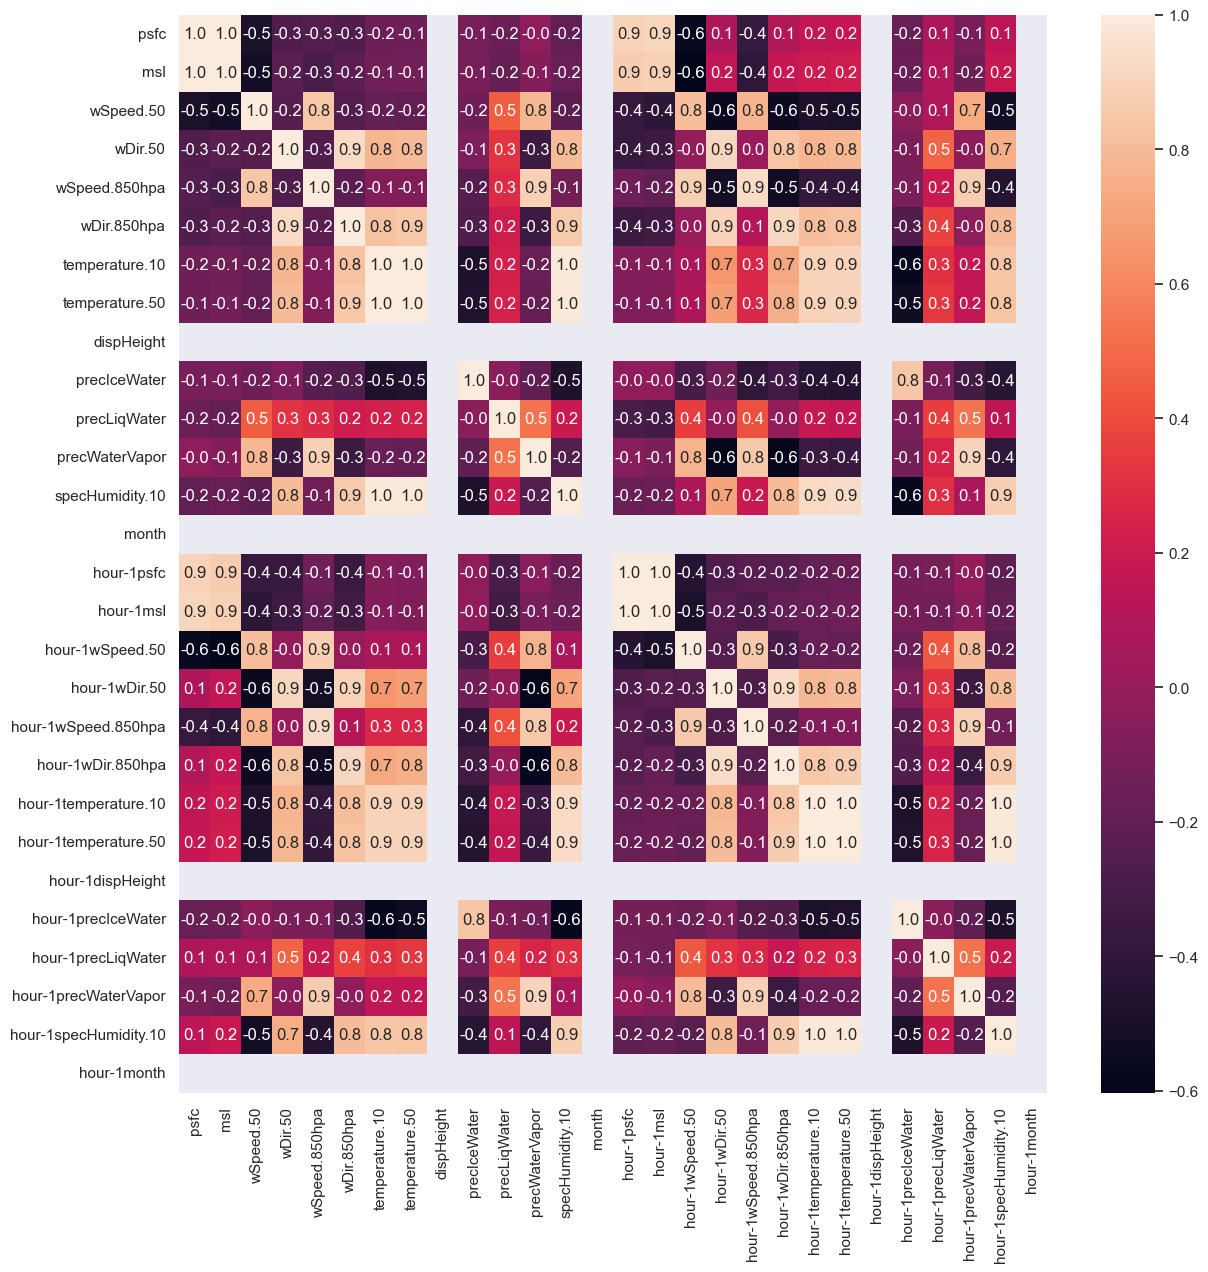

In [85]:
import seaborn as sns

sns.set(rc={'figure.figsize':(14,14)})
ax= sns.heatmap(rawData[:24:].corr(),annot=True,fmt='.1f')